In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [32]:
## Data Availablity

customers = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Python Case Study\Case Study 1 - Retail Case Study\Customer.csv")
customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [33]:
transanctions = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Python Case Study\Case Study 1 - Retail Case Study\Transactions.csv")
transanctions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [34]:
prod_cat = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Python Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv")
prod_cat.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [35]:
customer_final = pd.merge( left = customers , right = transanctions , left_on = 'customer_Id' , right_on = 'cust_id' , how = 'inner' )
customer_final = pd.merge(left = customer_final , right = prod_cat , on = 'prod_cat_code' , how = 'inner' )
customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics


In [36]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        99293 non-null  int64  
 1   DOB                99293 non-null  object 
 2   Gender             99253 non-null  object 
 3   city_code          99257 non-null  float64
 4   transaction_id     99293 non-null  int64  
 5   cust_id            99293 non-null  int64  
 6   tran_date          99293 non-null  object 
 7   prod_subcat_code   99293 non-null  int64  
 8   prod_cat_code      99293 non-null  int64  
 9   Qty                99293 non-null  int64  
 10  Rate               99293 non-null  int64  
 11  Tax                99293 non-null  float64
 12  total_amt          99293 non-null  float64
 13  Store_type         99293 non-null  object 
 14  prod_cat           99293 non-null  object 
 15  prod_sub_cat_code  99293 non-null  int64  
 16  prod_subcat        992

In [37]:
customer_final['DOB'] = pd.to_datetime( customer_final.DOB , format = '%d-%m-%Y' )
#customer_final['tran_date'] = pd.to_datetime( customer_final.tran_date , format = '%d-%m-%Y' )

customer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        99293 non-null  int64         
 1   DOB                99293 non-null  datetime64[ns]
 2   Gender             99253 non-null  object        
 3   city_code          99257 non-null  float64       
 4   transaction_id     99293 non-null  int64         
 5   cust_id            99293 non-null  int64         
 6   tran_date          99293 non-null  object        
 7   prod_subcat_code   99293 non-null  int64         
 8   prod_cat_code      99293 non-null  int64         
 9   Qty                99293 non-null  int64         
 10  Rate               99293 non-null  int64         
 11  Tax                99293 non-null  float64       
 12  total_amt          99293 non-null  float64       
 13  Store_type         99293 non-null  object        
 14  prod_c

In [38]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'], dayfirst=True, errors='coerce')
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        99293 non-null  int64         
 1   DOB                99293 non-null  datetime64[ns]
 2   Gender             99253 non-null  object        
 3   city_code          99257 non-null  float64       
 4   transaction_id     99293 non-null  int64         
 5   cust_id            99293 non-null  int64         
 6   tran_date          59869 non-null  datetime64[ns]
 7   prod_subcat_code   99293 non-null  int64         
 8   prod_cat_code      99293 non-null  int64         
 9   Qty                99293 non-null  int64         
 10  Rate               99293 non-null  int64         
 11  Tax                99293 non-null  float64       
 12  total_amt          99293 non-null  float64       
 13  Store_type         99293 non-null  object        
 14  prod_c

In [39]:
# the missing data

customer_final.isna().sum()/ customer_final.shape[0] * 100
# we can fill the trans date by the bfill( next valid value) and fffill(prev valid value)

customer_Id           0.000000
DOB                   0.000000
Gender                0.040285
city_code             0.036256
transaction_id        0.000000
cust_id               0.000000
tran_date            39.704712
prod_subcat_code      0.000000
prod_cat_code         0.000000
Qty                   0.000000
Rate                  0.000000
Tax                   0.000000
total_amt             0.000000
Store_type            0.000000
prod_cat              0.000000
prod_sub_cat_code     0.000000
prod_subcat           0.000000
dtype: float64

In [40]:
customer_final['tran_date'].fillna(method='ffill', inplace=True)
customer_final['tran_date'].fillna(method='bfill', inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_29480\1355469930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_final['tran_date'].fillna(method='ffill', inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_29480\1355469930.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customer_final['tran_date'].fillna(method='ffill', inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_29480\1355469930.py:2: FutureWarning: Series.fillna 

In [41]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        99293 non-null  int64         
 1   DOB                99293 non-null  datetime64[ns]
 2   Gender             99253 non-null  object        
 3   city_code          99257 non-null  float64       
 4   transaction_id     99293 non-null  int64         
 5   cust_id            99293 non-null  int64         
 6   tran_date          99293 non-null  datetime64[ns]
 7   prod_subcat_code   99293 non-null  int64         
 8   prod_cat_code      99293 non-null  int64         
 9   Qty                99293 non-null  int64         
 10  Rate               99293 non-null  int64         
 11  Tax                99293 non-null  float64       
 12  total_amt          99293 non-null  float64       
 13  Store_type         99293 non-null  object        
 14  prod_c

In [42]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
5,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,6,DIY
6,268408,1970-01-02,M,4.0,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,1,Mens
7,268408,1970-01-02,M,4.0,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,4,Women
8,268408,1970-01-02,M,4.0,16197868036,268408,2013-12-16,1,4,5,210,110.250,1160.250,Flagship store,Bags,1,Mens
9,268408,1970-01-02,M,4.0,16197868036,268408,2013-12-16,1,4,5,210,110.250,1160.250,Flagship store,Bags,4,Women


In [43]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99283,274308,1992-12-29,F,5.0,26208690928,274308,2012-10-22,1,2,2,898,188.58,1984.58,MBR,Footwear,4,Kids
99284,274308,1992-12-29,F,5.0,57358822237,274308,2012-10-22,1,2,4,876,367.92,3871.92,e-Shop,Footwear,1,Mens
99285,274308,1992-12-29,F,5.0,57358822237,274308,2012-10-22,1,2,4,876,367.92,3871.92,e-Shop,Footwear,3,Women
99286,274308,1992-12-29,F,5.0,57358822237,274308,2012-10-22,1,2,4,876,367.92,3871.92,e-Shop,Footwear,4,Kids
99287,274308,1992-12-29,F,5.0,58160544337,274308,2012-10-22,12,5,5,588,308.70,3248.70,e-Shop,Books,7,Fiction
99288,274308,1992-12-29,F,5.0,58160544337,274308,2012-10-22,12,5,5,588,308.70,3248.70,e-Shop,Books,12,Academic
99289,274308,1992-12-29,F,5.0,58160544337,274308,2012-10-22,12,5,5,588,308.70,3248.70,e-Shop,Books,10,Non-Fiction
99290,274308,1992-12-29,F,5.0,58160544337,274308,2012-10-22,12,5,5,588,308.70,3248.70,e-Shop,Books,11,Children
99291,274308,1992-12-29,F,5.0,58160544337,274308,2012-10-22,12,5,5,588,308.70,3248.70,e-Shop,Books,3,Comics
99292,274308,1992-12-29,F,5.0,58160544337,274308,2012-10-22,12,5,5,588,308.70,3248.70,e-Shop,Books,6,DIY


In [44]:
summary_5 =  customer_final.describe().T
summary_5.loc[ ::, 'min' : 'max']

,min,25%,50%,75%,max
customer_Id,266783.0,268956.0,270982.0,273120.0,275265.0
DOB,1970-01-02 00:00:00,1975-10-02 00:00:00,1981-06-23 00:00:00,1987-06-02 00:00:00,1992-12-29 00:00:00
city_code,1.0,3.0,5.0,8.0,10.0
transaction_id,3268991.0,24921504416.0,50110833106.0,75281214424.0,99987549630.0
cust_id,266783.0,268956.0,270982.0,273120.0,275265.0
tran_date,2011-01-25 00:00:00,2011-10-31 00:00:00,2012-08-15 00:00:00,2013-05-21 00:00:00,2014-02-28 00:00:00
prod_subcat_code,1.0,4.0,7.0,10.0,12.0
prod_cat_code,1.0,3.0,5.0,5.0,6.0
Qty,-5.0,1.0,3.0,4.0,5.0
Rate,-1499.0,313.0,713.0,1109.0,1500.0


In [45]:
summ1 = customer_final.select_dtypes('object').value_counts().reset_index(name = 'count')
summ1

,Gender,Store_type,prod_cat,prod_subcat,count
0,M,e-Shop,Books,Non-Fiction,1259
1,M,e-Shop,Books,Fiction,1259
2,M,e-Shop,Books,DIY,1259
3,M,e-Shop,Books,Comics,1259
4,M,e-Shop,Books,Children,1259
...,...,...,...,...,...
179,F,Flagship store,Bags,Women,200
180,F,MBR,Bags,Women,198
181,F,MBR,Bags,Mens,198
182,M,Flagship store,Bags,Women,189


## Plotting the Continous Variables

array([[<Axes: title={'center': 'customer_Id'}>,
        <Axes: title={'center': 'city_code'}>,
        <Axes: title={'center': 'transaction_id'}>],
       [<Axes: title={'center': 'cust_id'}>,
        <Axes: title={'center': 'prod_subcat_code'}>,
        <Axes: title={'center': 'prod_cat_code'}>],
       [<Axes: title={'center': 'Qty'}>,
        <Axes: title={'center': 'Rate'}>,
        <Axes: title={'center': 'Tax'}>],
       [<Axes: title={'center': 'total_amt'}>,
        <Axes: title={'center': 'prod_sub_cat_code'}>, <Axes: >]],
      dtype=object)

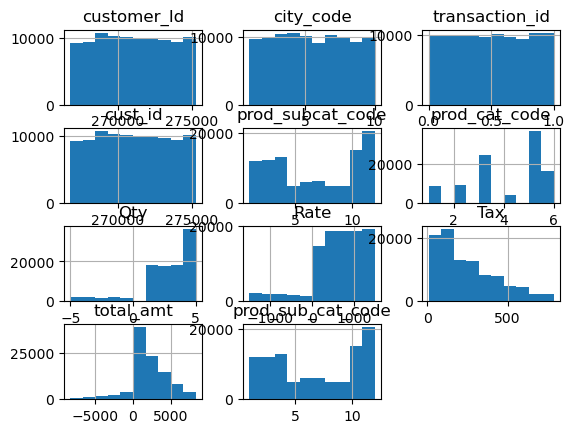

In [47]:
# histograms for continous vars

customer_final.select_dtypes(['int64' , 'float64'] ).hist()

* **Due to the lack of space in the above hists we will make the udf for the same**

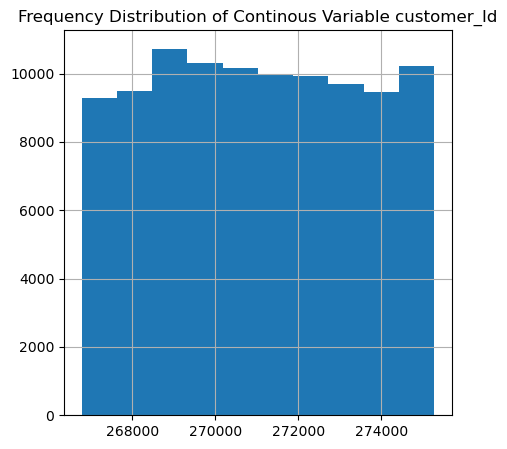

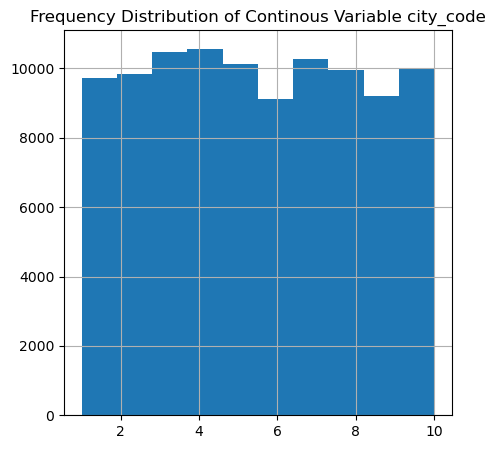

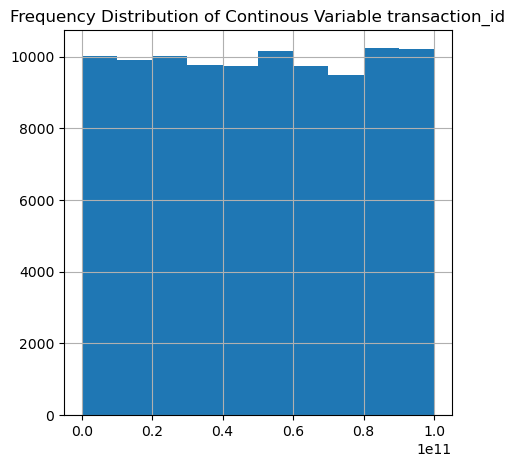

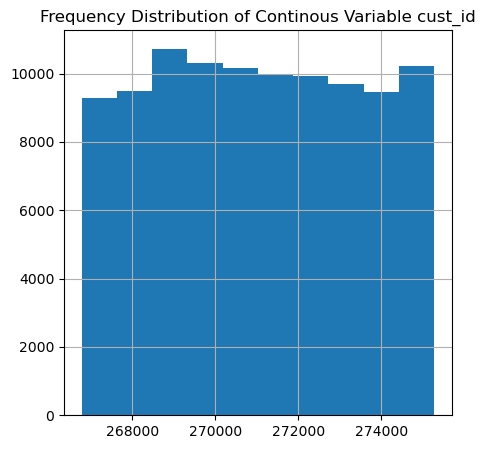

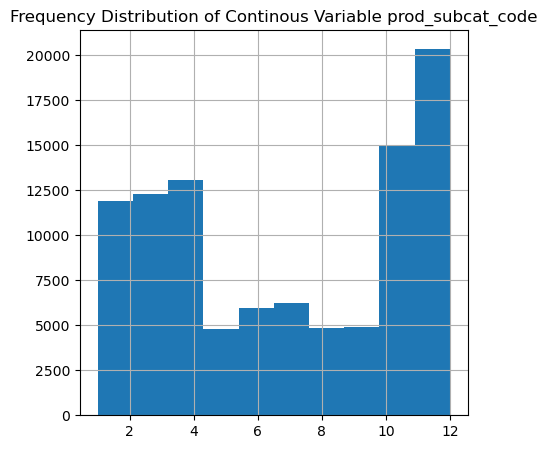

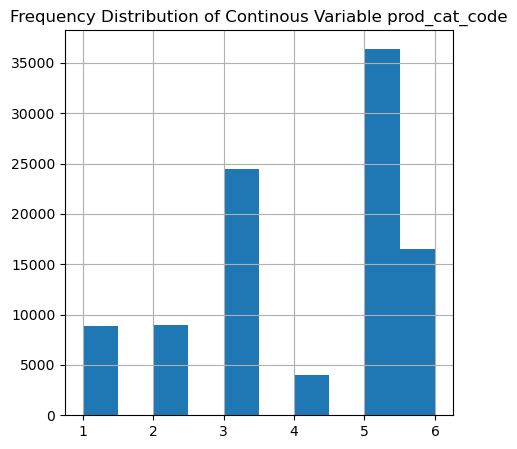

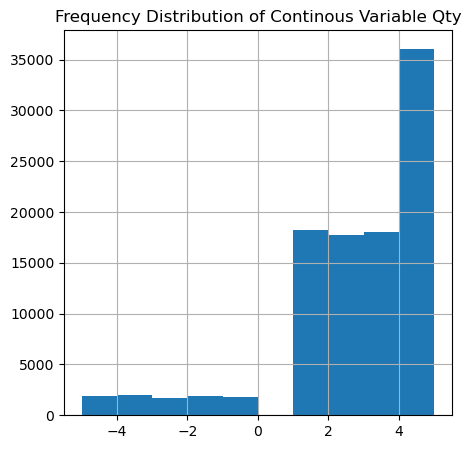

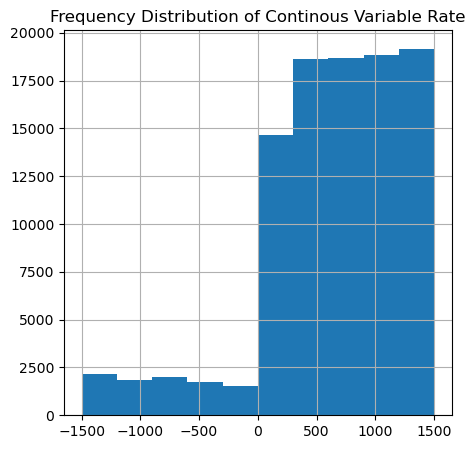

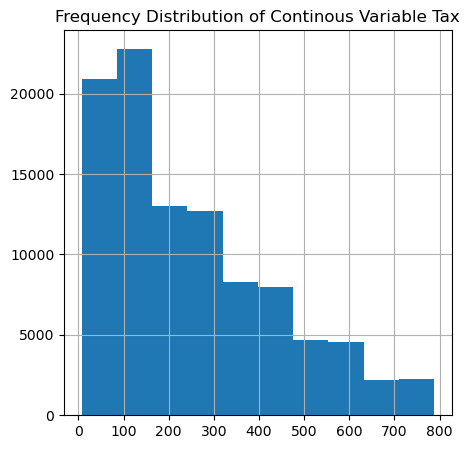

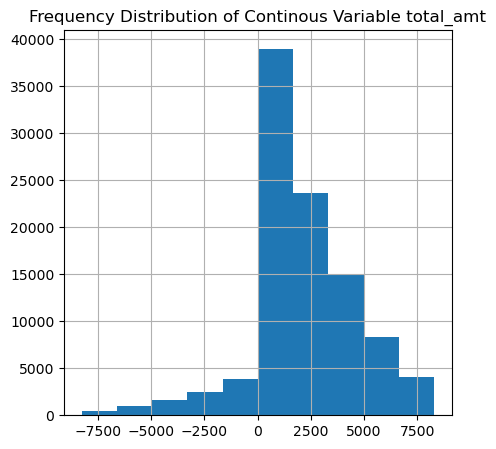

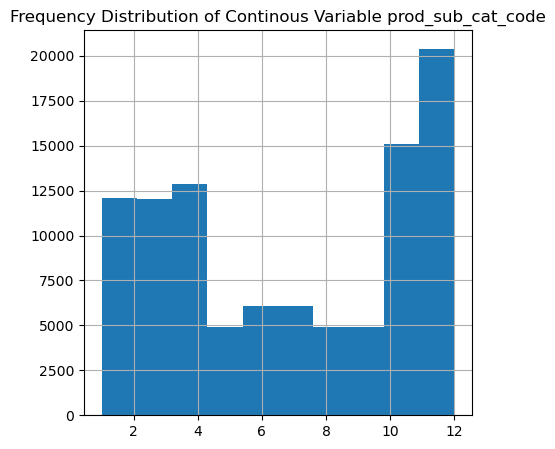

customer_Id          None
city_code            None
transaction_id       None
cust_id              None
prod_subcat_code     None
prod_cat_code        None
Qty                  None
Rate                 None
Tax                  None
total_amt            None
prod_sub_cat_code    None
dtype: object

In [49]:
def histograms(x):
    plt.figure(figsize = (5,5) )
    plt.title("Frequency Distribution of Continous Variable " + x.name )
    x.hist()
    plt.show()
        
customer_final.select_dtypes(['int64' , 'float64'] ).apply(histograms)    

In [50]:
customer_final.select_dtypes('object')

,Gender,Store_type,prod_cat,prod_subcat
0,M,TeleShop,Books,Fiction
1,M,TeleShop,Books,Academic
2,M,TeleShop,Books,Non-Fiction
3,M,TeleShop,Books,Children
4,M,TeleShop,Books,Comics
...,...,...,...,...
99288,F,e-Shop,Books,Academic
99289,F,e-Shop,Books,Non-Fiction
99290,F,e-Shop,Books,Children
99291,F,e-Shop,Books,Comics


In [51]:
cols = customer_final.select_dtypes('object').columns
cols

Index(['Gender', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

## Plotting the Categorigal Variables

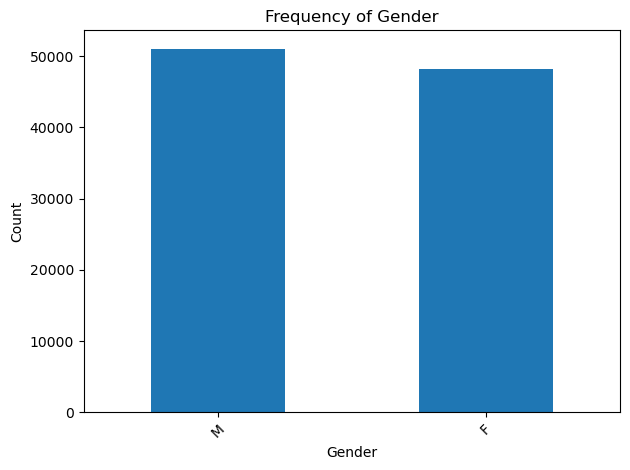

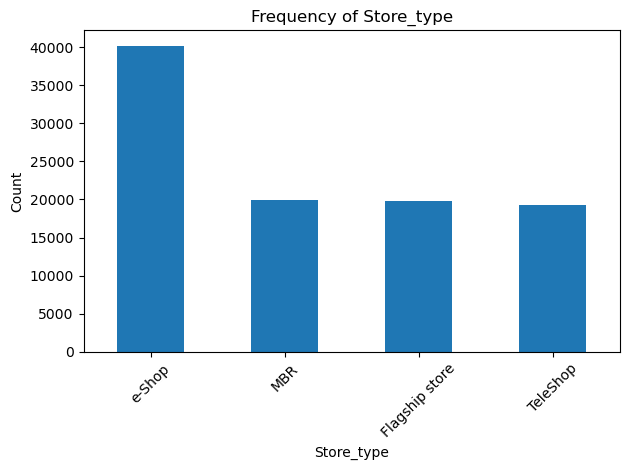

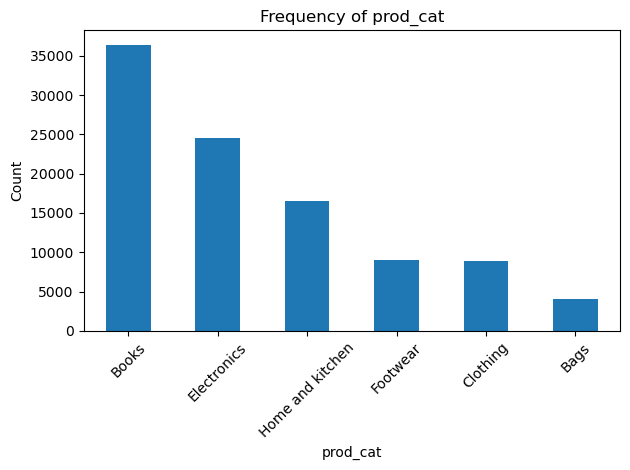

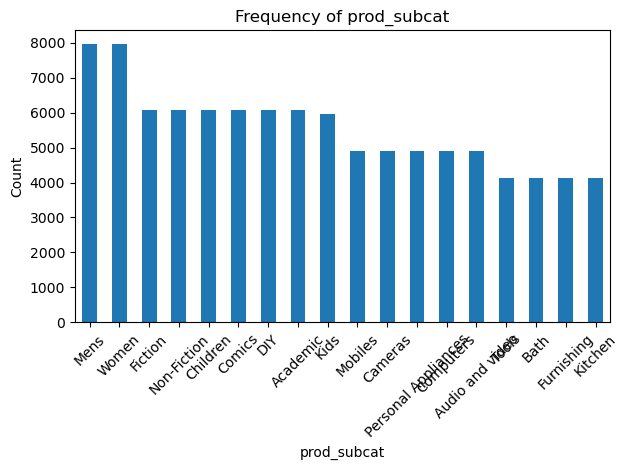

In [53]:
for i in cols:
    customer_final[i].value_counts().plot(kind = 'bar')
    plt.title(f'Frequency of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [54]:
## Time period of the available trans data
start = customer_final['tran_date'].min()  # earliest date
end = customer_final['tran_date'].max()    # latest date
time_period = end - start

# Approximate months (as float)
months = time_period.days / 30

# Approximate years (as float)
years = time_period.days / 365

print(f'The start date is {start}')
print(f'The end date is {end}')
print(f'The time period of the tran_date is {time_period}')
print(f'The approximate number of months is {months:.2f}')
print(f'The approximate number of years is {years: .2f}')

The start date is 2011-01-25 00:00:00
The end date is 2014-02-28 00:00:00
The time period of the tran_date is 1130 days 00:00:00
The approximate number of months is 37.67
The approximate number of years is  3.10


In [55]:
## total amt of trans is negative

neg_qty = customer_final[ customer_final.Qty < 0 ]
len(neg_qty)

9294

In [56]:
## prod popular within males & females customers

pop_prod = customer_final.groupby([ 'Gender' , 'prod_cat' , 'prod_subcat'])['Qty'].sum().reset_index()

pop_prod_sorted = pop_prod.sort_values( ['Gender' , 'Qty'] , ascending = [ True , False ] )

prod_gender = pop_prod_sorted.groupby('Gender').head(1).reset_index(drop = True)
prod_gender

,Gender,prod_cat,prod_subcat,Qty
0,F,Books,Academic,7070
1,M,Books,Academic,7587


In [57]:
### Which City code has the maximum customers and what was the percentage of customers from that city?

cust_count = customer_final.groupby('city_code')['cust_id'].nunique()

total_cust = customer_final['cust_id'].nunique()

top_city_code = cust_count.idxmax()

top_city_cnt = cust_count.max()

# calculate the percentage

percent = (top_city_cnt / total_cust)*100

print(f"City code with the maximum customers: {top_city_code}")
print(f"Number of customers from that city: {top_city_cnt}")
print(f"Percentage of customers from that city: {percent:.2f}%")

City code with the maximum customers: 3.0
Number of customers from that city: 576
Percentage of customers from that city: 10.46%


In [69]:
## 7. Which store type sells the maximum products by value and by quantity?


sales_by_value = customer_final.groupby('Store_type')['total_amt'].sum().sort_values(ascending=False)
store_max_value = sales_by_value.idxmax()
value_max_value = sales_by_value.max()


sales_by_qty = customer_final.groupby('Store_type')['Qty'].sum().sort_values(ascending=False)
store_max_qty = sales_by_qty.idxmax()
value_max_qty = sales_by_qty.max()


print(f"Store type with maximum sales by value: {store_max_value} ({value_max_value:,.2f})")
print(f"Store type with maximum sales by quantity: {store_max_qty} ({value_max_qty:,} units)")



Store type with maximum sales by value: e-Shop (85,915,747.84)
Store type with maximum sales by quantity: e-Shop (98,447 units)


In [59]:
## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

flagship_stores = customer_final.loc[ (customer_final.Store_type == 'Flagship store') & ( customer_final.prod_cat.isin( ['Electronics' , 'Clothing' ])) ]

flagship_stores['total_amt'].sum()


14658949.89

In [61]:
 ### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

male_pop = customer_final.loc[ (customer_final.Gender == 'M') & ( customer_final.prod_cat == 'Electronics' ) ]

male_pop['total_amt'].sum()

28515547.125

In [63]:
## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

# remove trans with negative amt

cleaned_data = customer_final[ customer_final.Qty > 0 ]

unique_recs = cleaned_data.groupby('cust_id')['transaction_id'].nunique() 

unique_recs[ unique_recs > 10 ]

cust_id
266794    11
270535    11
270803    11
272741    11
273014    11
274227    11
Name: transaction_id, dtype: int64

In [83]:
## 11. For all customers aged between 25 - 35, find out:
   #a. What was the total amount spent for “Electronics” and “Books” product categories?
   #b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


# cus between 25-35 years of age
customer_final['Age'] = pd.Timestamp.today().year - customer_final['DOB'].dt.year


In [87]:
customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction,55
1,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic,55
2,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction,55
3,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children,55
4,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics,55


In [101]:
#a. What was the total amount spent for “Electronics” and “Books” product categories?

custs = customer_final[ (customer_final.Age >=25) & (customer_final.Age<=35) ]
filtered = custs.loc[ custs.prod_cat.isin(['Electronics' , 'Books'] ) , 'total_amt' ]
filtered.sum()

15517429.915

In [111]:
#b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

dates = custs[ (custs.tran_date >= '2014-01-01') & (custs.tran_date <= '2014-03-01') ]
dates.loc[:,'total_amt'].sum()

1212224.78

## Dashboard

* **CUSTOMER DEMOGRAPHICS**

Text(0.5, 1.0, 'Gender Distribution')

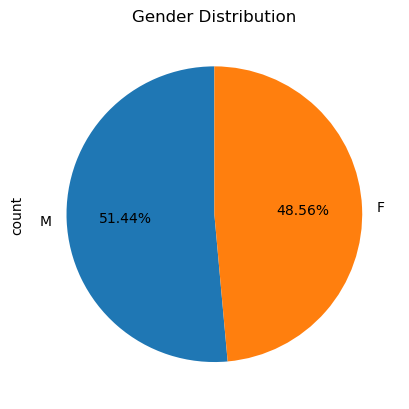

In [133]:
# Gender Distribution

customer_final.Gender.value_counts().plot(kind = 'pie' , autopct = '%.2f%%' , startangle=90)
plt.title('Gender Distribution')

* **PRODUCT INSIGHTS**

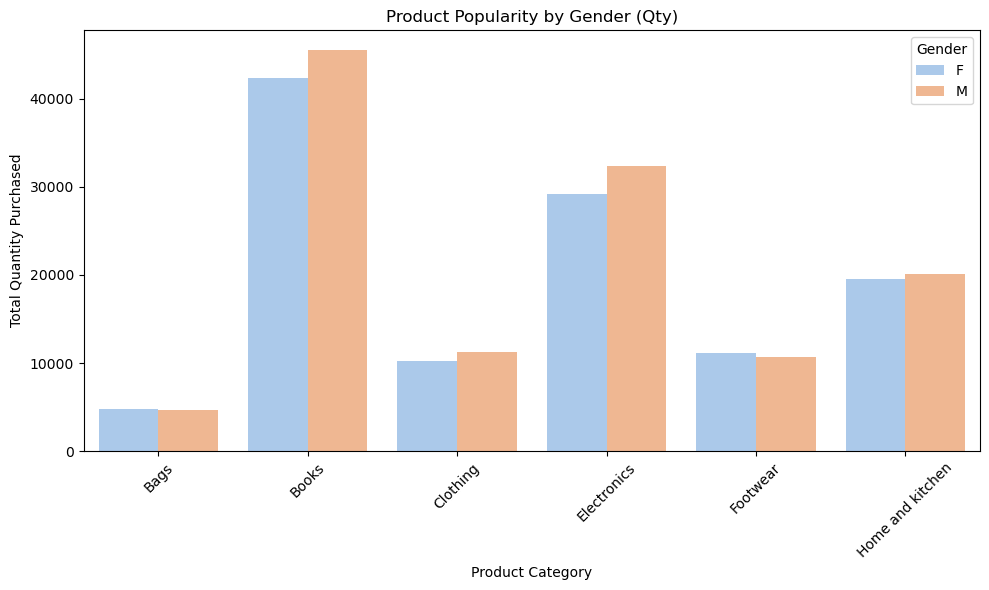

In [136]:
# gender wise product sales
grouped = customer_final.groupby(['prod_cat', 'Gender'])['Qty'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='prod_cat', y='Qty', hue='Gender', palette='pastel')

plt.title('Product Popularity by Gender (Qty)')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* **Sales Analysis**

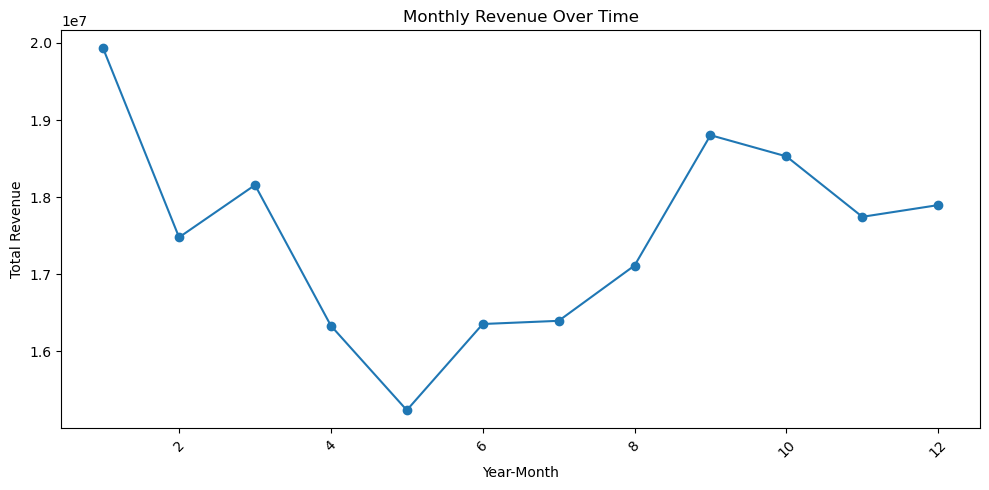

In [157]:
# monthly revenue overtime

customer_final['Months'] = customer_final['tran_date'].dt.month
monthly_revenue = customer_final.groupby('Months')['total_amt'].sum()
monthly_revenue.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

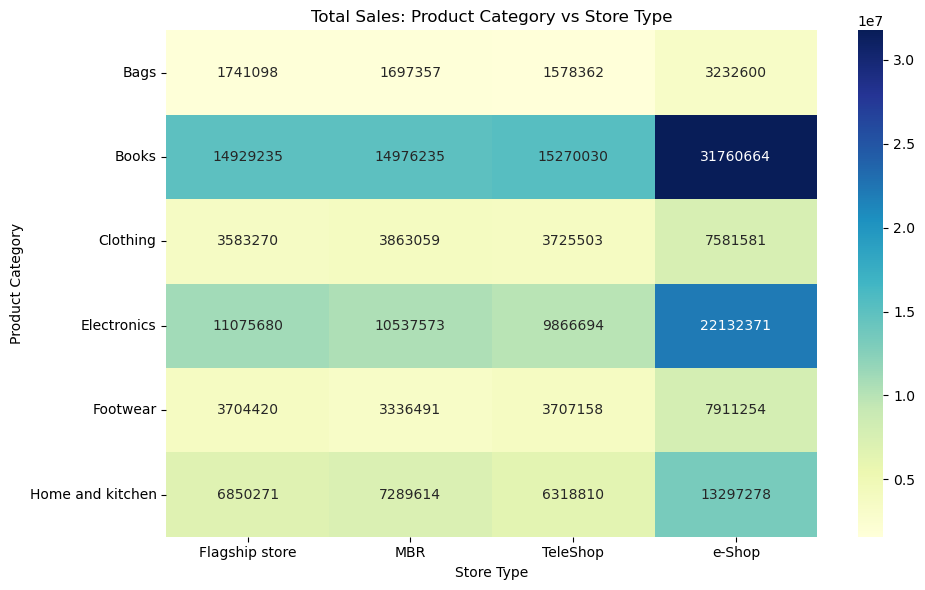

In [163]:
# category vs store type

data = customer_final.groupby(['prod_cat', 'Store_type'])['total_amt'].sum().unstack(fill_value=0)


plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Sales: Product Category vs Store Type')
plt.xlabel('Store Type')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


* **Transaction Behaviour**

C:\Users\Hp\AppData\Local\Temp\ipykernel_29480\2799751776.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities_by_customers.index, y=top_cities_by_customers.values, palette='Set2')


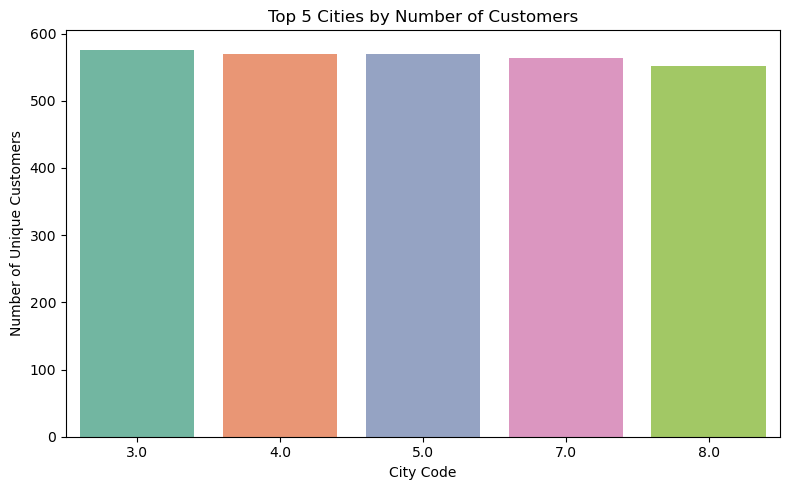

In [166]:
# top 5 cities

top_cities_by_customers = customer_final.groupby('city_code')['cust_id'].nunique().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities_by_customers.index, y=top_cities_by_customers.values, palette='Set2')
plt.title('Top 5 Cities by Number of Customers')
plt.xlabel('City Code')
plt.ylabel('Number of Unique Customers')
plt.tight_layout()
plt.show()


* **TIME BASED PATTERNS**

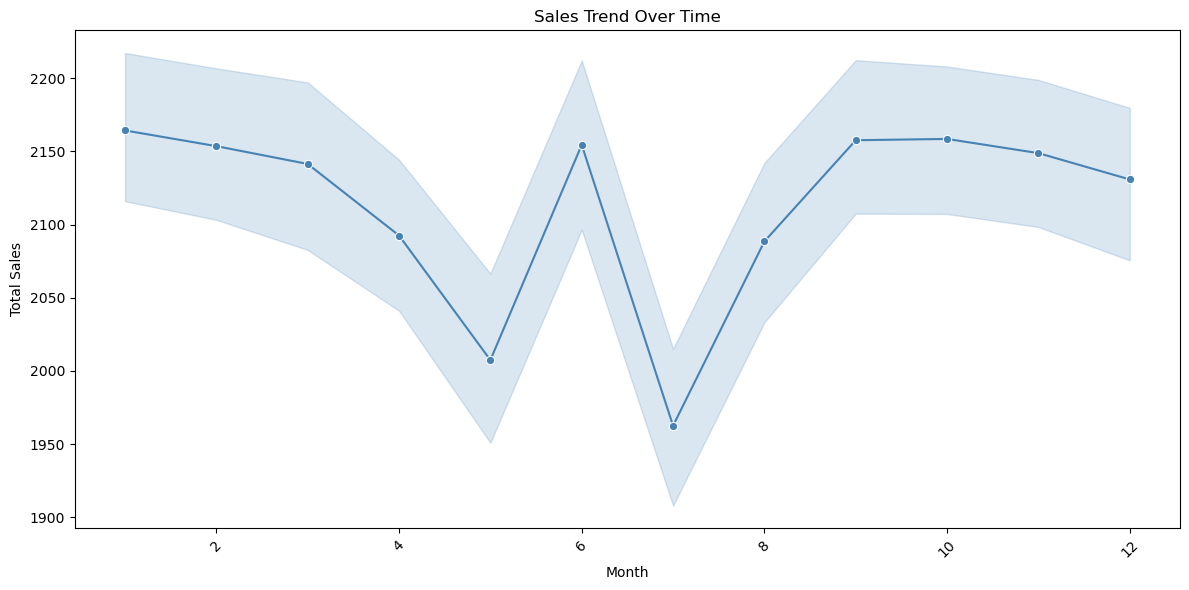

In [171]:
# Sales Trend Over Time

plt.figure(figsize=(12, 6))
sns.lineplot(data=customer_final, x='Months', y='total_amt', marker='o', color='steelblue')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
